## Preamble

In [17]:
from pydci.examples.monomial import monomial
from pydci.log import enable_log
from pydci import PCAMUDProblem, WMEMUDProblem
from scipy.stats.distributions import norm
import numpy as np
import matplotlib.pyplot as plt
import importlib

__author__ = "Carlos del-Castillo-Negrete"
__copyright__ = "Carlos del-Castillo-Negrete"
__license__ = "mit"

seed = 123456

enable_log()

[04/07/23 00:49:32] INFO     Logger initialized                                                           ]8;id=810603;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=710399;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#35\35]8;;\

<loguru.logger handlers=[(id=2, level=20, sink=<RichHandler (NOTSET)>)]>

### <a id='Title'></a>
# <center> WME and PCA Problem Class
_____

<center>
    Notebook by:
    <br>
    Carlos del-Castillo-Negrete (<font color='blue'>cdelcastillo21@gmail.com</font>)
</center>

The purpose of this notebook is to demonstrate usage of the `WMEProblem` and `PCAProblem` classes for solving parameter estimation problems.

# <a id='Title'></a> Problem Set-Up - Data-Consistent Update

TODO: Update

$\Large \pi_{up}(\lambda) = \pi_{in}(\lambda)\frac{\pi_{ob}(Q(\lambda))}{\pi_{pred}(Q(\lambda))}$

Note:

* $\pi_{in}$ represents initial descripton of aleatoric, or irreducible, uncertainty on $\Lambda$.

* Data-Consistent comes from Disintegration theorem and Bayes rule [ref].


## Example 1 - Low Dimensional Example
---

We start with a simple QoI map over a one-dimensional parameter space:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q(\lambda) = \lambda^5 \rightarrow \mathcal{D} = [-1, 1] $$

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

### Data

We take $N$ samples from an initial uniform distribution over the input parameter space. These samples will be pushed forward through our QoI map to constrcut the predicted density $\pi_{pred}$:

In [18]:
# Number of samples to use, and assumed observed normal distribution parameters
np.random.seed(seed)
p, num_samples, mu, sigma, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam, q_lam, data = monomial(
    p=p,
    num_samples=num_samples,
    domain=domain,
    mu=mu,
    sigma=sigma,
    N=1)
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 1), (1,))

# PCA Map

In [19]:
# Construct density problem object using lambda samples and QoI Values
# Note by default DensityProblem class assumes uniform distribution over domain if nothing specified
# The predicted distribution will be determined from a Gaussian Kernel Density Estimate over predicted values
# Have to set observed distribution -> assuming known sample mean, 0.25, and std dev, 0.1, from observed data.
importlib.reload(PCAMUDProblem)
pca_prob = PCAMUDProblem.PCAMUDProblem(lam, q_lam, data, sigma)
pca_prob.solve()

[04/07/23 00:49:37] INFO     Adding q_lam of size 1 to dataframe                                       ]8;id=754203;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=74016;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=362512;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=918307;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=535538;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=369549;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=749982;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=660284;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=13128;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=696214;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

In [20]:
pca_prob.result

,e_r,kl,lam_MUD_0
0,0.789373,2.120273,0.772383


In [21]:
pca_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0,q_pca_0
0,1.0,0.453013,0.040624,0.000004,0.000092,0.000042,-0.746060,-0.231137,-4.811371
1,1.0,0.370229,0.017349,0.000011,0.000622,0.000230,0.933436,0.708634,4.586340
2,1.0,0.535527,0.318165,0.009037,0.028402,0.015210,-0.479048,-0.025229,-2.752287
3,1.0,0.454461,0.024735,0.319768,12.927849,5.875209,0.794473,0.316516,0.665161
4,1.0,0.514298,0.332514,0.017133,0.051526,0.026500,-0.246501,-0.000910,-2.509101
...,...,...,...,...,...,...,...,...,...
995,1.0,0.488401,0.326470,0.025256,0.077361,0.037783,0.432104,0.015064,-2.349359
996,1.0,0.499770,0.330691,0.021298,0.064406,0.032188,0.379948,0.007918,-2.420819
997,1.0,0.541642,0.328767,0.012515,0.038067,0.020619,-0.420394,-0.013130,-2.631305
998,1.0,0.541358,0.327796,0.012021,0.036673,0.019853,-0.429739,-0.014656,-2.646562


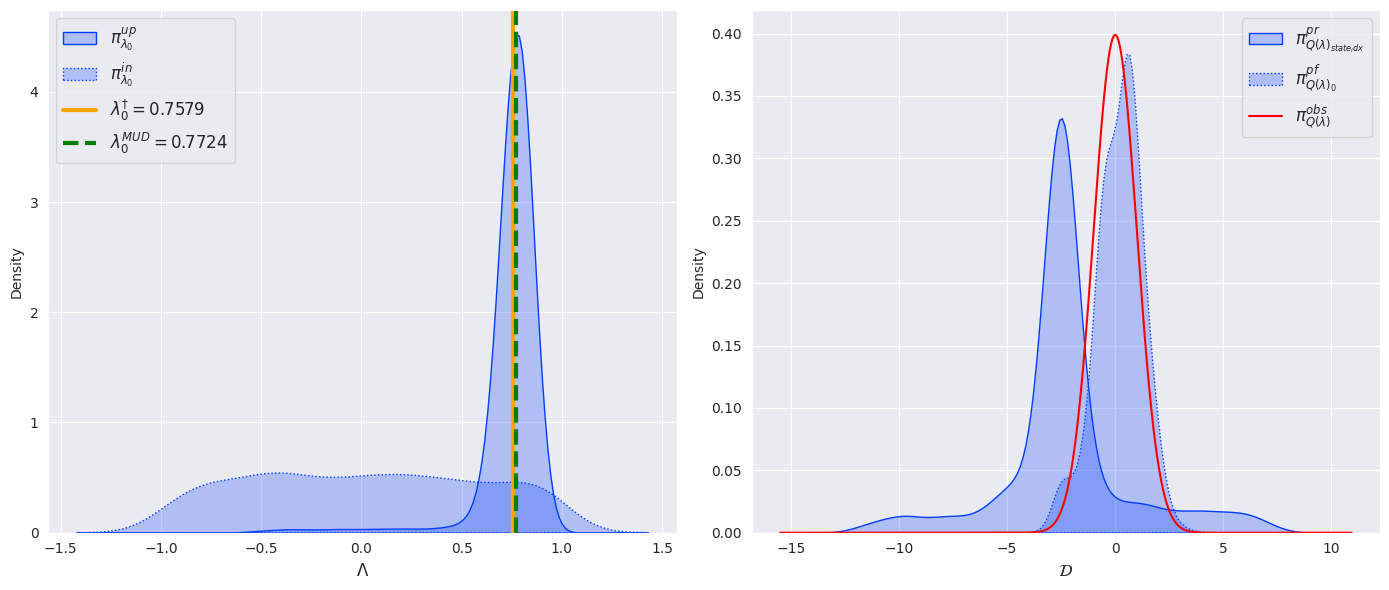

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
_, _ = pca_prob.plot_param_state(ax=axs[0], true_vals=[[0.25**0.2]]), pca_prob.plot_obs_state(ax=axs[1])

## Aggregating More Data

Lets increase the number of data points we use.
We can see how with the $Q_{PCA}$ map we reduce the variance in the MUD estimate as more datapoints are used in the map.

[04/07/23 00:49:45] INFO     Adding q_lam of size 1 to dataframe                                       ]8;id=134030;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=771640;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=159946;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=571247;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=674956;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=201524;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=666421;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=926829;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=938772;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=394265;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

        e_r        kl  lam_MUD_0
0  0.829235  2.144348   0.771117


                    INFO     Adding q_lam of size 10 to dataframe                                      ]8;id=34923;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=528300;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=123194;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=403681;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=678750;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=390959;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=665114;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=974045;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=890699;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=282135;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

        e_r        kl  lam_MUD_0
0  0.956181  4.993374   0.765819


[04/07/23 00:49:46] INFO     Adding q_lam of size 100 to dataframe                                     ]8;id=612344;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=274075;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=487087;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=428338;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=304735;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=573921;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=32657;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=658477;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=917419;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=44592;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

        e_r        kl  lam_MUD_0
0  0.655981  6.415199    0.76042


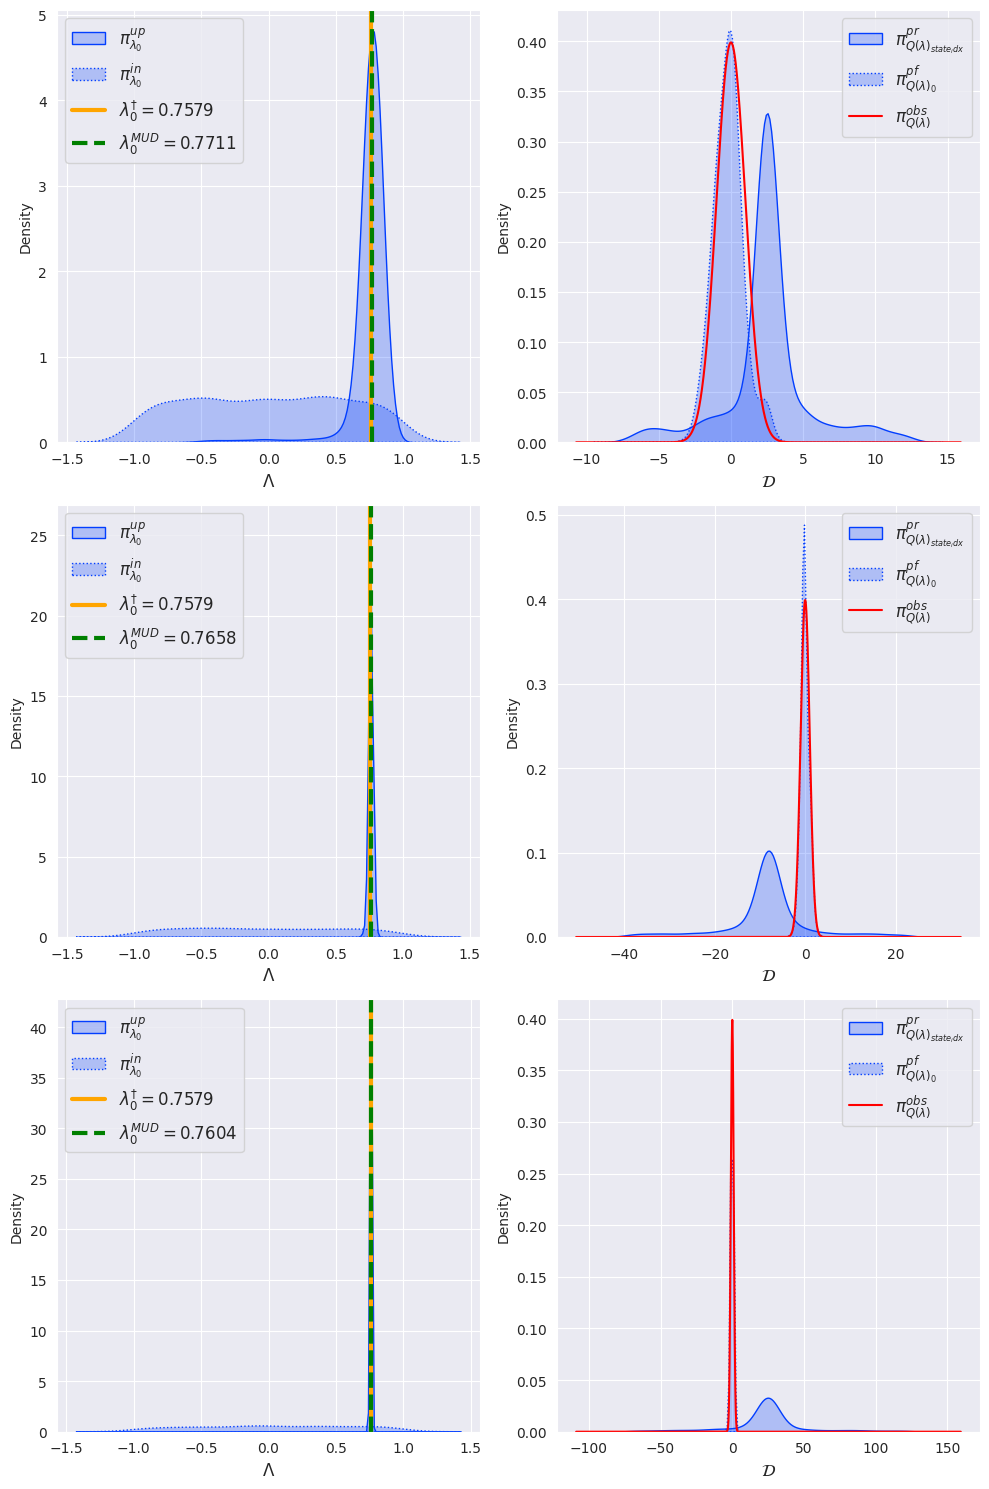

In [23]:
N_vals = [1, 10, 100]

fig, ax = plt.subplots(len(N_vals), 2, figsize=(10, 5*len(N_vals)))
for i, N in enumerate(N_vals):
    lam, q_lam, data = monomial(
        p=p,
        num_samples=num_samples,
        domain=domain,
        mu=mu,
        sigma=sigma,
        N=N)
    pca_prob = PCAMUDProblem.PCAMUDProblem(lam, q_lam, data, sigma)
    pca_prob.solve()
    _ = pca_prob.plot_param_state(true_vals=[[0.25**0.2]], ax=ax[i][0])
    _ = pca_prob.plot_obs_state(ax=ax[i][1])
    print(pca_prob.result)

## Masking data used

Can use the mask argument to control what data we use in aggregating for the p

In [26]:
# Number of samples to use, and assumed observed normal distribution parameters
p, num_samples, mu, sigma, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam, q_lam, data = monomial(
    p=p,
    num_samples=num_samples,
    domain=domain,
    mu=mu,
    sigma=sigma,
    N=100)
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 100), (100,))

[04/07/23 00:50:13] INFO     Adding q_lam of size 100 to dataframe                                     ]8;id=758305;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=425554;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam of size 1 to dataframe                                         ]8;id=544796;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=285802;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding q_pca of size 1 to dataframe                                       ]8;id=844584;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=208876;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=697358;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=182516;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

                    INFO     Adding lam_MUD of size 1 to dataframe                                     ]8;id=419214;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py\utils.py]8;;\:]8;id=377563;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/utils.py#147\147]8;;\

        e_r        kl  lam_MUD_0
0  0.914972  4.807961    0.76292


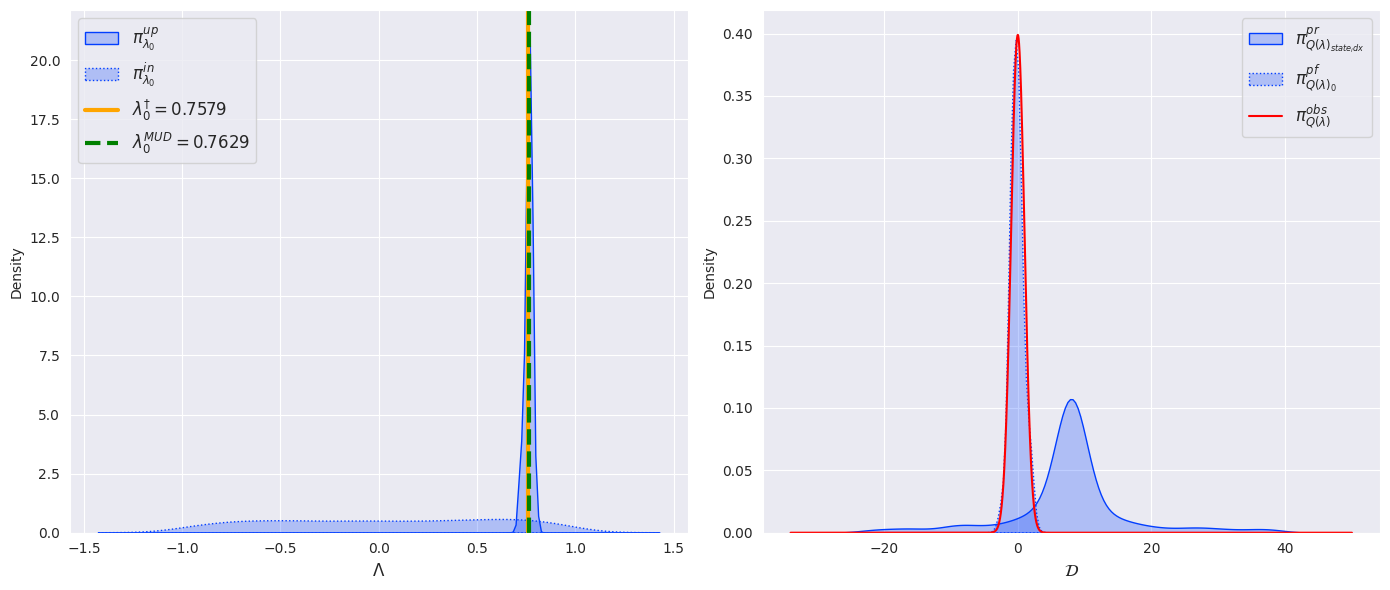

In [28]:
pca_prob = PCAMUDProblem.PCAMUDProblem(lam, q_lam, data, sigma)
pca_prob.pca_mask = range(10)
pca_prob.solve()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
_, _ = pca_prob.plot_param_state(ax=axs[0], true_vals=[[0.25**0.2]]), pca_prob.plot_obs_state(ax=axs[1])
print(pca_prob.result)

# Appendix: WME Map

The $Q_{WME}$ is a pre-cursor to the $Q_{PCA}$ map. 

TODO: More

In [ ]:
# Construct density problem object using lambda samples and QoI Values
# Note by default DensityProblem class assumes uniform distribution over domain if nothing specified
# The predicted distribution will be determined from a Gaussian Kernel Density Estimate over predicted values
# Have to set observed distribution -> assuming known sample mean, 0.25, and std dev, 0.1, from observed data.
importlib.reload(WMEMUDProblem)
wme_prob = WMEMUDProblem.WMEMUDProblem(lam, q_lam, data, sigma)
wme_prob.solve()

In [ ]:
wme_prob.result

,e_r,kl,lam_MUD_0
0,0.230464,0.489307,0.999503


In [ ]:
wme_prob.state

,lam_0,q_lam_0,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_wme_0
0,-0.746060,-0.231137,1.0,0.453013,1.284658,0.394351,0.306970,0.139061,0.152149
1,0.933436,0.708634,1.0,0.370229,0.548637,0.394768,0.719544,0.266396,-0.145033
2,-0.479048,-0.025229,1.0,0.535527,10.061247,0.397434,0.039501,0.021154,0.087035
3,0.794473,0.316516,1.0,0.454461,0.782185,0.398854,0.509923,0.231740,-0.021034
4,-0.246501,-0.000910,1.0,0.514298,10.515017,0.397688,0.037821,0.019451,0.079345
...,...,...,...,...,...,...,...,...,...
995,0.432104,0.015064,1.0,0.488401,10.323894,0.397843,0.038536,0.018821,0.074293
996,0.379948,0.007918,1.0,0.499770,10.457360,0.397775,0.038038,0.019010,0.076553
997,-0.420394,-0.013130,1.0,0.541642,10.396515,0.397564,0.038240,0.020712,0.083209
998,-0.429739,-0.014656,1.0,0.541358,10.365825,0.397548,0.038352,0.020762,0.083692


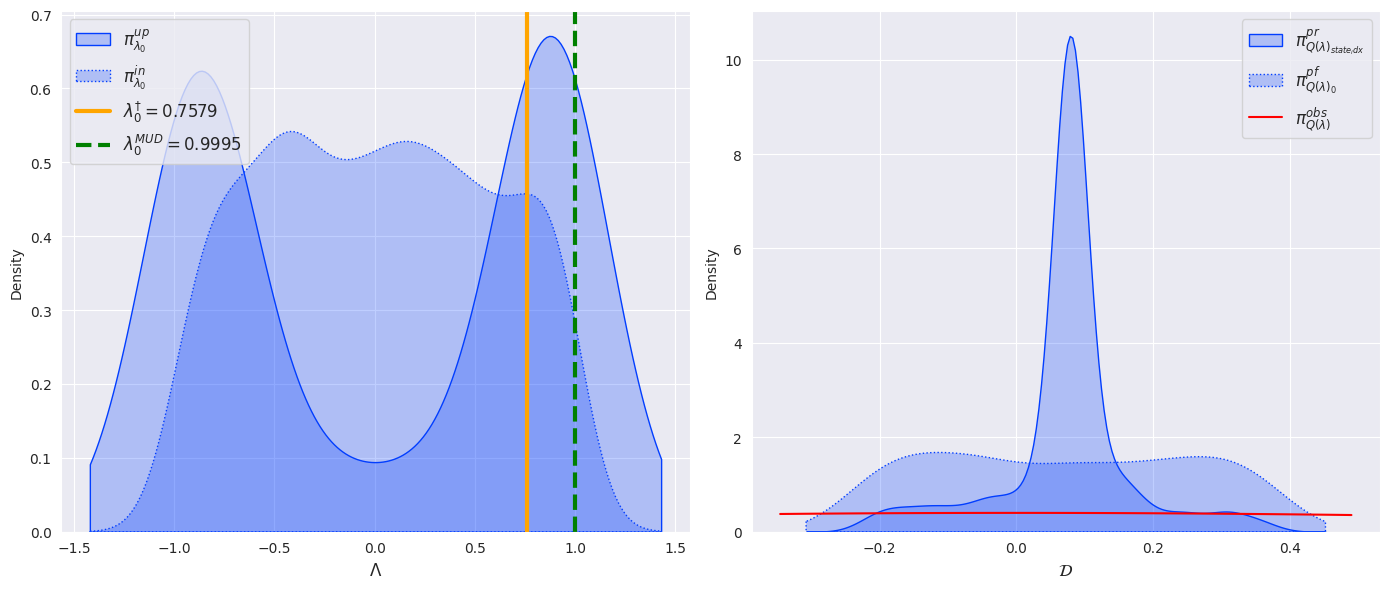

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
_, _ = wme_prob.plot_param_state(ax=axs[0], true_vals=[[0.25**0.2]]), wme_prob.plot_obs_state(ax=axs[1])

## Aggregating More Data

Lets increase the number of data points we use.
We can see how with the $Q_{WME}$ map we reduce the variance in the MUD estimate as more datapoints are used in the map.

        e_r        kl  lam_MUD_0
0  0.235081  0.489879   0.995044
        e_r        kl  lam_MUD_0
0  0.888939  0.288629   0.851996
        e_r        kl  lam_MUD_0
0  0.693604  4.966406   0.759928


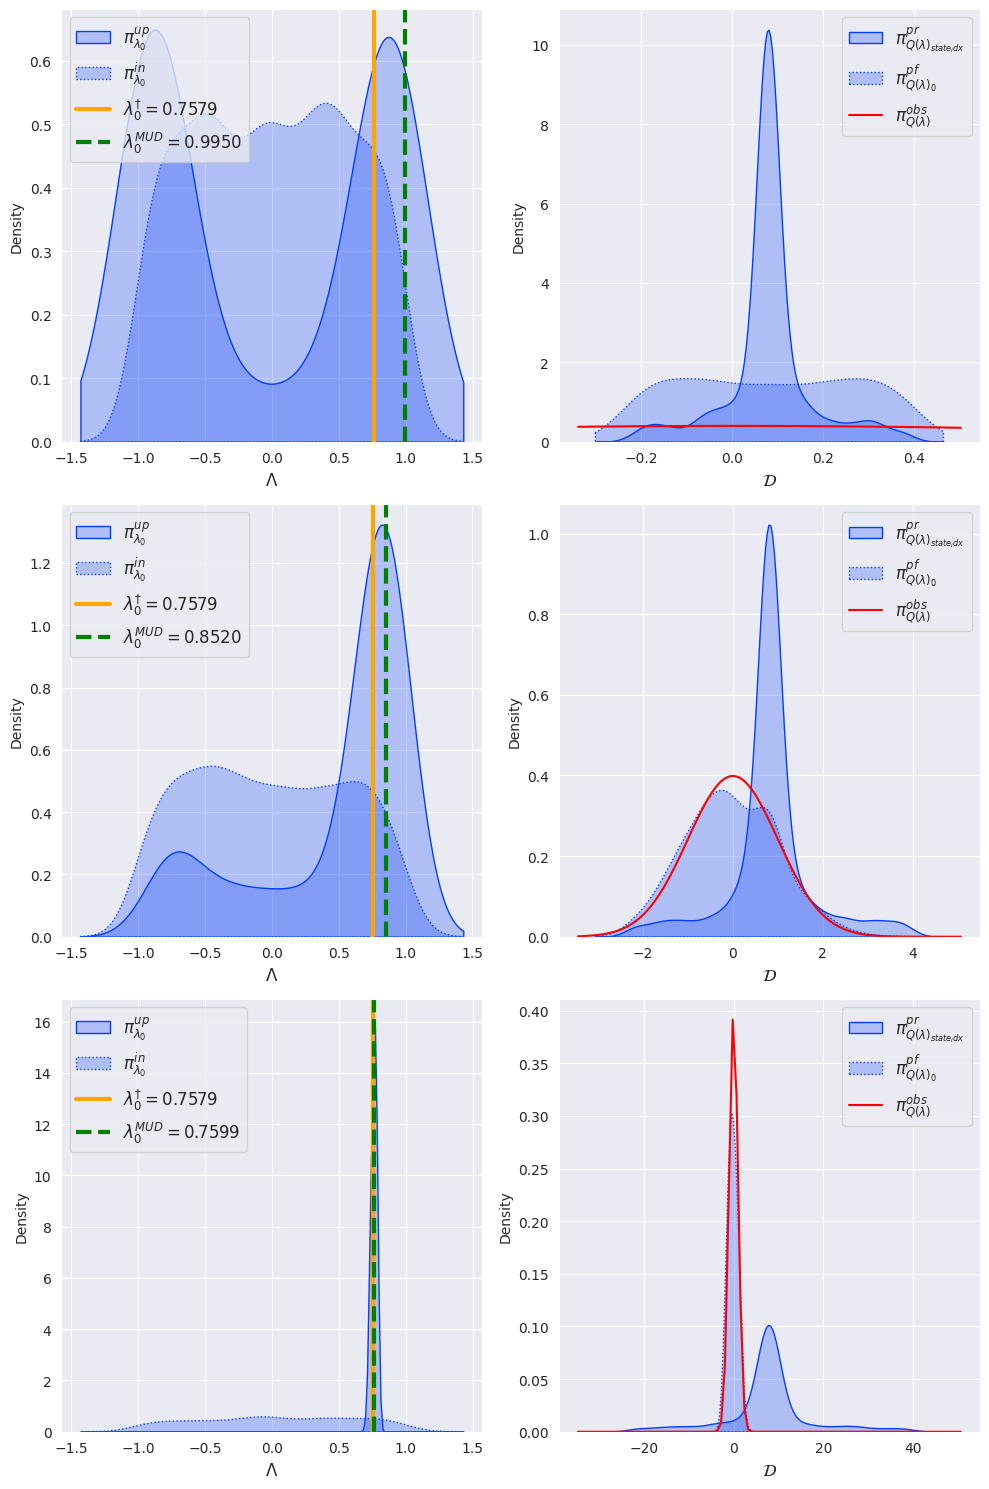

In [ ]:
N_vals = [1, 10, 100]

fig, ax = plt.subplots(len(N_vals), 2, figsize=(10, 5*len(N_vals)))

for i, N in enumerate(N_vals):
    lam, q_lam, data = monomial(
        p=p,
        num_samples=num_samples,
        domain=domain,
        mu=mu,
        sigma=sigma,
        N=N)
    wme_prob = WMEMUDProblem.WMEMUDProblem(lam, q_lam, data, sigma)
    wme_prob.solve()
    _ = wme_prob.plot_param_state(true_vals=[[0.25**0.2]], ax=ax[i][0])
    _ = wme_prob.plot_obs_state(ax=ax[i][1])
    print(wme_prob.result)